---
### Preparando os dados

#### Import da base com todas as variáveis

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('dados/final.csv')
dataframe[['no_entidade','nota enem']].head()

,no_entidade,nota enem
0,EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA,539.94
1,EEEFM PADRE EZEQUIEL RAMIN,485.33
2,EEEFM CORA CORALINA,479.49
3,EEEFM ANISIO TEIXEIRA,468.94
4,COLEGIO TIRADENTES DA POLICIA MILITAR - CTPM III,482.38


#### Tratarmento de colunas categoricas

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19022 entries, 0 to 19021
Columns: 188 entries, Unnamed: 0 to nota enem
dtypes: float64(14), int64(49), object(125)
memory usage: 27.3+ MB


##### Informações de localização

Como temos Indice de Nivel Socioeconomico (INSE) por escola, achamos que informações relacionadas à localização não sejam relavantes, pois fatores relacionado ao desenvolvimento do municipio já foi levado em consideração no calculo do indicador.

In [4]:
cols_localizacao = ['co_regiao','co_uf','co_municipio','co_mesorregiao','co_microrregiao']
dataframe.drop(columns=cols_localizacao, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19022 entries, 0 to 19021
Columns: 183 entries, Unnamed: 0 to nota enem
dtypes: float64(14), int64(44), object(125)
memory usage: 26.6+ MB


##### Indicadores de presença de equipamentos

In [5]:
cols_in_equipamentos = [
    'in_internet','in_internet_alunos','in_internet_administrativo','in_internet_aprendizagem',
    'in_internet_comunidade','in_acesso_internet_computador','in_aces_internet_disp_pessoais',
    'in_equip_scanner','in_banda_larga','in_material_ped_multimidia','in_material_ped_infantil',
    'in_material_ped_cientifico','in_material_ped_difusao','in_material_ped_musical',
    'in_material_ped_jogos','in_material_ped_artisticas','in_material_ped_desportiva',
    'in_material_ped_indigena','in_material_ped_etnico','in_material_ped_campo','tp_rede_local'
]
dataframe[cols_in_equipamentos] = dataframe[cols_in_equipamentos].astype('category')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19022 entries, 0 to 19021
Columns: 183 entries, Unnamed: 0 to nota enem
dtypes: category(21), float64(14), int64(44), object(104)
memory usage: 23.9+ MB


##### Indicadores relacionados à estrutura

In [6]:
cols_in_estrutura = [
    'in_vinculo_secretaria_educacao','in_vinculo_seguranca_publica','in_vinculo_secretaria_saude',
    'in_vinculo_outro_orgao','in_conveniada_pp','in_mant_escola_privada_emp','in_mant_escola_privada_ong',
    'in_mant_escola_privada_oscip','in_mant_escola_priv_ong_oscip','in_mant_escola_privada_sind',
    'in_mant_escola_privada_sist_s','in_mant_escola_privada_s_fins','in_local_func_predio_escolar',
    'in_local_func_socioeducativo','in_local_func_unid_prisional','in_local_func_prisional_socio',
    'in_local_func_galpao','in_local_func_salas_outra_esc','in_local_func_outros','in_predio_compartilhado',
    'in_agua_potavel','in_energia_rede_publica','in_esgoto_rede_publica','in_almoxarifado','in_area_verde',
    'in_auditorio','in_banheiro','in_banheiro_funcionarios','in_banheiro_chuveiro','in_biblioteca',
    'in_biblioteca_sala_leitura','in_cozinha','in_dormitorio_aluno','in_dormitorio_professor',
    'in_laboratorio_ciencias','in_laboratorio_informatica','in_parque_infantil','in_piscina','in_quadra_esportes',
    'in_refeitorio','in_sala_atelie_artes','in_sala_musica_coral','in_sala_estudio_danca','in_sala_multiuso',
    'in_sala_diretoria','in_sala_leitura','in_sala_professor','in_sala_repouso_aluno','in_secretaria',
    'in_terreirao','in_viveiro','in_dependencias_outras','in_alimentacao','tp_categoria_escola_privada',
    'tp_localizacao','tp_localizacao_diferenciada','tp_ocupacao_galpao','tp_ocupacao_predio_escolar'
]
dataframe[cols_in_estrutura] = dataframe[cols_in_estrutura].astype('category')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19022 entries, 0 to 19021
Columns: 183 entries, Unnamed: 0 to nota enem
dtypes: category(79), float64(14), int64(44), object(46)
memory usage: 16.5+ MB


##### Indicadores relacionados à administração

In [7]:
cols_in_administracao = [
    'in_serie_ano','in_periodos_semestrais','in_fundamental_ciclos','in_grupos_nao_seriados',
    'in_modulos','in_formacao_alternancia','in_educacao_indigena','in_exame_selecao','in_reserva_ppi',
    'in_reserva_renda','in_reserva_publica','in_reserva_pcd','in_reserva_outros','in_reserva_nenhuma',
    'in_redes_sociais','in_espaco_atividade','in_espaco_equipamento','in_orgao_ass_pais',
    'in_orgao_ass_pais_mestres','in_orgao_conselho_escolar','in_orgao_gremio_estudantil','in_orgao_outros',
    'in_orgao_nenhum','in_diurno','in_noturno','in_ead','in_bas','in_inf','in_inf_cre','in_inf_pre',
    'in_fund','in_fund_ai','in_fund_af','in_med','in_prof','in_prof_tec','in_eja','in_eja_fund','in_eja_med',
    'in_esp','in_esp_cc','in_esp_ce','tp_convenio_poder_publico','tp_dependencia','tp_lingua'
]
dataframe[cols_in_administracao] = dataframe[cols_in_administracao].astype('category')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19022 entries, 0 to 19021
Columns: 183 entries, Unnamed: 0 to nota enem
dtypes: category(124), float64(14), int64(44), object(1)
memory usage: 10.8+ MB


##### Demais colunas não categoricas/numéricas

O nome da escola não é relevante para determinar qual nota no ENEM a escola obteve, portanto iremos removê-la do nosso dataset.

In [8]:
dataframe.drop(columns='no_entidade',inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19022 entries, 0 to 19021
Columns: 182 entries, Unnamed: 0 to nota enem
dtypes: category(124), float64(14), int64(44)
memory usage: 10.7 MB


##### Variáveis categoricas para numericas

In [9]:
dataframe = pd.get_dummies(dataframe, drop_first=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19022 entries, 0 to 19021
Columns: 220 entries, Unnamed: 0 to tp_lingua_portugues
dtypes: float64(14), int64(44), uint8(162)
memory usage: 11.4 MB


<AxesSubplot:xlabel='valor inse', ylabel='nota enem'>

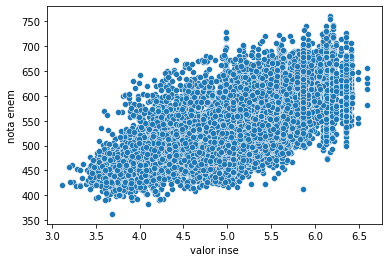

In [10]:
#apagar
import seaborn as sns
sns.scatterplot(data=dataframe, x='valor inse', y='nota enem')

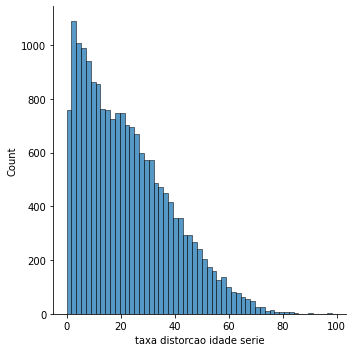

In [11]:
sns.displot(data=dataframe, x='taxa distorcao idade serie', kind='hist')

#### Normalização

Como a maior parte das variaveis são binarias, podemos aplicar a normalização MinMaxScaler (não temos outliers significativos).

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataframe)
df_norm = scaler.transform(dataframe)
df_norm = pd.DataFrame(df_norm, columns=dataframe.columns)
df_norm.head()

,Unnamed: 0,qt_salas_utilizadas,qt_salas_utiliza_climatizadas,qt_equip_dvd,qt_equip_som,qt_equip_tv,qt_equip_lousa_digital,qt_equip_multimidia,qt_desktop_aluno,qt_comp_portatil_aluno,...,in_prof_sim,in_prof_tec_sim,in_eja_sim,in_eja_fund_sim,in_eja_med_sim,in_esp_sim,in_esp_cc_sim,in_esp_ce_sim,tp_lingua_indigena,tp_lingua_portugues
0,0.000592,0.062780,0.117188,0.013514,0.007143,0.023256,0.03,0.058824,0.008571,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000608,0.192825,0.242188,0.013514,0.014286,0.162791,0.00,0.088235,0.015714,0.014851,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.000160,0.107623,0.000000,0.000000,0.007143,0.085271,0.00,0.035294,0.017857,0.000000,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.000162,0.071749,0.132812,0.054054,0.028571,0.031008,0.00,0.029412,0.008571,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.000169,0.076233,0.140625,0.000000,0.000000,0.023256,0.02,0.058824,0.002857,0.006931,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


Divisão Treino / Teste

In [13]:
import numpy as np
df_norm = df_norm.sample(frac=1)
y = df_norm['nota enem']
X = df_norm.drop(columns=['nota enem'])
print(X.shape, y.shape)


X, y = np.array(X), np.array(y)

(19022, 219) (19022,)


---
### Construindo o modelo

#### Definição dos hiperparametros

In [34]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_validate
# from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
cv_results = cross_validate(model, X=X, y=y, cv=3, n_jobs=-1, return_train_score=True, 
    scoring=('neg_mean_absolute_error', 'neg_mean_squared_error'))
print(cv_results['test_neg_mean_absolute_error'])

[-1.24960455e+06 -2.14307360e+05 -5.08945670e-02]


In [24]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

#### Definição das métricas de validação

---
### Aplicação do Modelo

#### Treino

#### Teste